In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')

In [95]:
DM2codes = ['25000','25002','25010','25012','25020','25022','25030','25032',
         '25040','25042','25050','25052','25060','25062','25070','25072',
         '25080','25082''25090','25092','V5867']

In [96]:
DM2patients = []
for index,row in diagnoses.iterrows():
    if(row['ICD9_CODE'] in DM2codes):
        DM2patients.append(row['SUBJECT_ID'])
DM2patients = list(set(DM2patients))

In [97]:
print(len(DM2patients))

9785


In [98]:
admissions = pd.read_csv('ADMISSIONS.csv')

In [99]:
allPatients = []
multipleVisits = []
for index,row in admissions.iterrows():
    if(row['SUBJECT_ID'] in allPatients):
        multipleVisits.append(row['SUBJECT_ID'])
    else:
        allPatients.append(row['SUBJECT_ID'])
multipleVisits = list(set(multipleVisits))

In [100]:
print(len(multipleVisits))

7537


In [101]:
DM2multiVisits = []
for patient in multipleVisits:
    if patient in DM2patients:
        DM2multiVisits.append(patient)

In [102]:
print(len(DM2multiVisits))

2634


In [103]:
Num_Visits_Lib = {}
for index, row in admissions.iterrows():
    if(row['SUBJECT_ID'] in DM2multiVisits):
        if(row['SUBJECT_ID'] in Num_Visits_Lib):
            Num_Visits_Lib[row['SUBJECT_ID']] += 1;
        else:
            Num_Visits_Lib[row['SUBJECT_ID']] = 1; 
    

In [104]:
df = pd.DataFrame(columns=['patient','times_visited'])
for patient,visits in Num_Visits_Lib.items():
    new_row = pd.DataFrame([[patient,visits]],columns=['patient','times_visited'])
    df = df.append(new_row)    

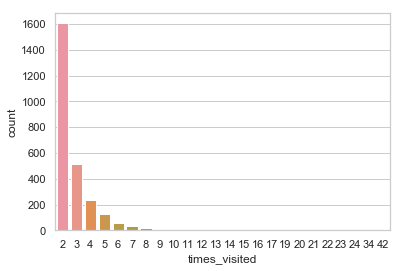

In [105]:
sns.set(style="whitegrid")
ax = sns.countplot(x="times_visited", data=df)

In [106]:
Hadm_Lib = {}
for index,row in admissions.iterrows():
    if(row['SUBJECT_ID'] in DM2multiVisits):
        Hadm_Lib.setdefault(row['SUBJECT_ID'], []).append(row['HADM_ID'])

In [107]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return True 
    else: 
        return False

In [108]:
all_hadm = []
for patient,hadm in Hadm_Lib.items():
    for x in hadm:
        all_hadm.append(x)  

In [109]:
All_Hadm_Lib = {}
for index,row in diagnoses.iterrows():
    if(row['HADM_ID'] in all_hadm):
        All_Hadm_Lib.setdefault(row['HADM_ID'], []).append(row['ICD9_CODE'])

In [110]:
masterDF = pd.DataFrame(columns=['hadm_id','diabeties code'])
for hadm,codes in All_Hadm_Lib.items():
    code_list = []
    for code in codes:
        code_list.append(code)
    new_row = pd.DataFrame([[hadm,(common_member(code_list,DM2codes))]],columns=['hadm_id','diabeties code'])
    masterDF = masterDF.append(new_row)       

In [111]:
print(masterDF.head(5))

  hadm_id diabeties code
0  140784           True
0  164853           True
0  113323           True
0  198214           True
0  192180          False


In [112]:
no_diabetes = []
yes_diabetes = []
for index,row in masterDF.iterrows():
    if (row['diabeties code'] == False):
        no_diabetes.append(row['hadm_id'])
    else:
        yes_diabetes.append(row['hadm_id'])

In [113]:
print(len(no_diabetes))
print(len(yes_diabetes))

1812
5869


In [114]:
masterDF['SUBJECT_ID'] = 0
masterDF = masterDF.reset_index(drop=True)

In [115]:
for patient,hadm in Hadm_Lib.items():
    for index,row in masterDF.iterrows():
        if row['hadm_id'] in hadm:
            masterDF.at[index, 'SUBJECT_ID'] = patient

In [116]:
print(masterDF.head(5))

  hadm_id diabeties code  SUBJECT_ID
0  140784           True         117
1  164853           True         117
2  113323           True         130
3  198214           True         130
4  192180          False         135


In [117]:
timeDF = pd.DataFrame(columns=['hadm_id','time'])

for index,row in admissions.iterrows():
    if(row['HADM_ID'] in all_hadm):
        new_row = pd.DataFrame([[row['HADM_ID'],row['ADMITTIME']]],columns=['hadm_id','time'])
        timeDF = timeDF.append(new_row) 

In [118]:
print(timeDF.head(5))

  hadm_id                 time
0  174486  2197-12-06 07:13:00
0  145674  2198-08-02 04:49:00
0  122609  2198-11-01 22:36:00
0  101651  2199-10-20 12:05:00
0  117876  2199-12-21 22:37:00


In [119]:
masterDF = pd.merge(left=masterDF,right=timeDF, left_on='hadm_id', right_on='hadm_id')

In [120]:
#print(masterDF)

In [121]:
POI = []
for index,row in masterDF.iterrows():
    if(row['diabeties code'] == False):
        POI.append(row['SUBJECT_ID'])
POI = list(set(POI))



In [122]:
masterDF['time']=pd.to_datetime(masterDF['time'])
masterDF = masterDF.sort_values(by=['time'])
#print(masterDF)

     hadm_id diabeties code  SUBJECT_ID                time
1415  155234          False       10174 2131-02-15 16:42:00
1401  119127           True       10174 2132-03-24 16:53:00
1400  110010           True       10174 2135-11-15 20:59:00
1414  130645           True       10174 2136-11-14 13:47:00
1402  126170           True       10174 2139-07-17 23:05:00


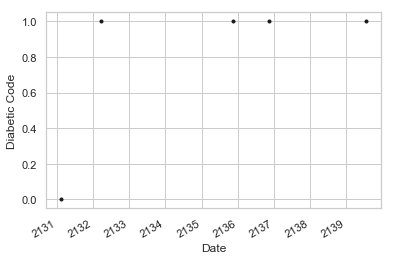

    hadm_id diabeties code  SUBJECT_ID                time
919  110243          False        6079 2189-03-03 07:30:00
920  118608           True        6079 2196-05-19 13:46:00


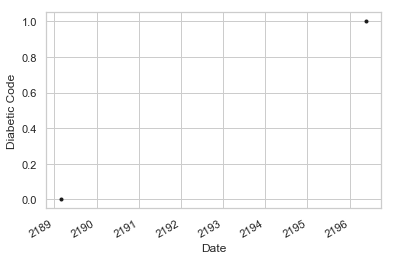

     hadm_id diabeties code  SUBJECT_ID                time
3982  187360          False       24510 2195-01-22 20:26:00
3997  199516           True       24510 2195-02-18 22:18:00
3981  166466          False       24510 2196-06-26 16:39:00


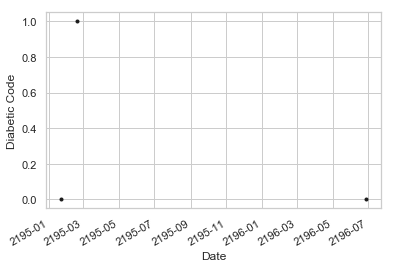

    hadm_id diabeties code  SUBJECT_ID                time
373  138520          False        1985 2101-05-07 18:05:00
371  117366           True        1985 2104-01-08 20:58:00
372  135108           True        1985 2108-02-20 21:00:00


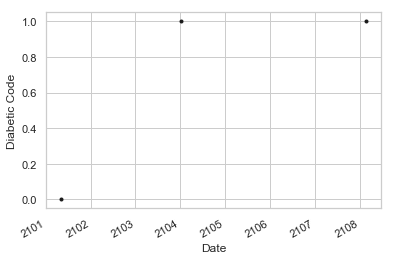

     hadm_id diabeties code  SUBJECT_ID                time
5592  173679          False       32707 2126-05-16 14:05:00
5591  164334           True       32707 2128-01-20 22:46:00
5589  128977          False       32707 2128-02-12 14:35:00
5590  156381          False       32707 2128-05-25 14:36:00


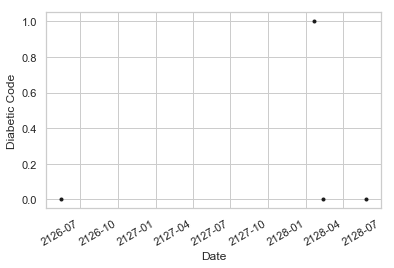

    hadm_id diabeties code  SUBJECT_ID                time
532  137710           True        1988 2124-06-22 15:29:00
531  130982          False        1988 2128-06-22 14:27:00
533  165323          False        1988 2128-07-15 21:13:00
530  127215          False        1988 2128-08-25 14:41:00
534  177047          False        1988 2129-01-15 17:45:00


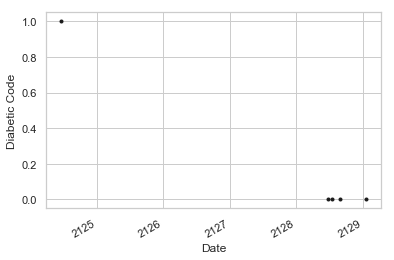

    hadm_id diabeties code  SUBJECT_ID                time
536  165343           True        1991 2192-07-15 17:03:00
537  187693          False        1991 2193-04-03 21:30:00
535  111425           True        1991 2194-07-28 07:15:00


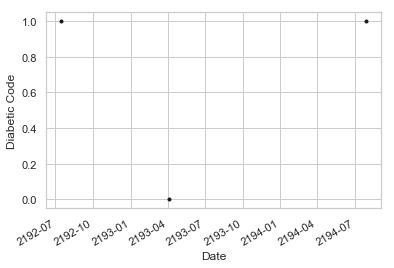

     hadm_id diabeties code  SUBJECT_ID                time
1736  166663           True       12234 2162-10-27 16:58:00
1735  132552          False       12234 2164-01-31 18:55:00


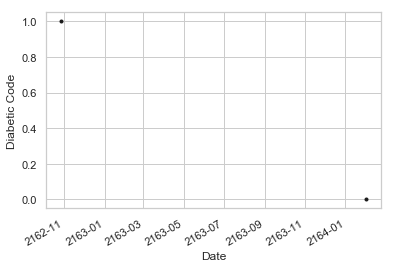

    hadm_id diabeties code  SUBJECT_ID                time
554  168476           True        1999 2147-05-04 17:29:00
553  133284          False        1999 2148-01-19 20:24:00
555  187312          False        1999 2148-03-26 20:56:00


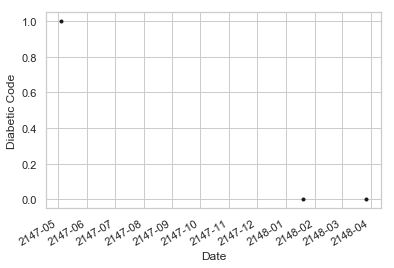

     hadm_id diabeties code  SUBJECT_ID                time
5668  108351           True       40911 2122-01-06 20:41:00
5671  158782           True       40911 2122-02-20 21:26:00
5667  103604           True       40911 2122-05-04 21:42:00
5669  135210           True       40911 2122-05-10 15:27:00
5670  153650          False       40911 2122-06-30 17:38:00
5672  188361           True       40911 2122-08-01 08:13:00


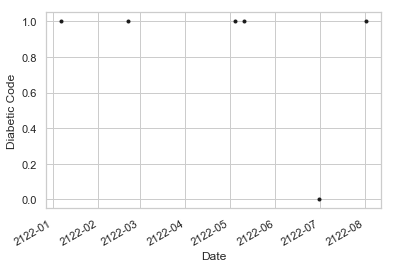

     hadm_id diabeties code  SUBJECT_ID                time
1765  160329          False       12249 2182-06-02 18:54:00
1764  149378           True       12249 2182-07-02 21:54:00


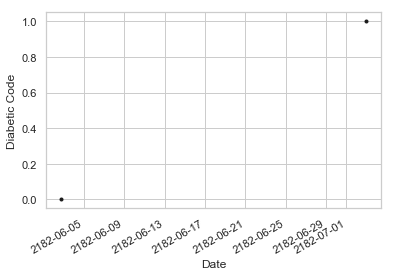

     hadm_id diabeties code  SUBJECT_ID                time
7549  165366          False       96218 2187-09-21 18:29:00
7548  122615           True       96218 2187-10-07 10:38:00
7550  186386          False       96218 2189-05-10 14:00:00


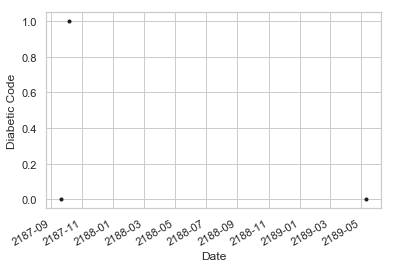

     hadm_id diabeties code  SUBJECT_ID                time
7282  183584           True       83932 2123-02-22 16:10:00
7281  164214           True       83932 2123-02-28 18:25:00
7280  121042           True       83932 2123-04-16 19:41:00
7279  105861           True       83932 2123-07-13 18:03:00
7169  194259          False       83932 2123-11-07 19:27:00


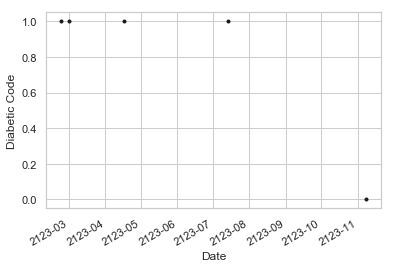

     hadm_id diabeties code  SUBJECT_ID                time
1428  165403          False       10206 2150-12-02 22:59:00
1427  163365           True       10206 2154-03-13 12:00:00


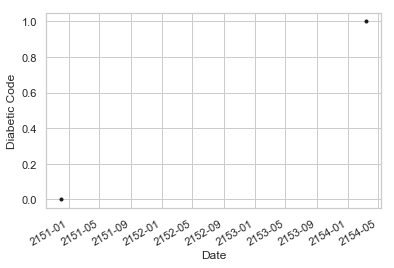

     hadm_id diabeties code  SUBJECT_ID                time
1091  118463          False        8167 2121-09-29 18:08:00
1090  117923           True        8167 2130-10-03 04:22:00


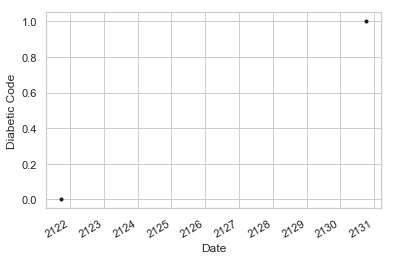

     hadm_id diabeties code  SUBJECT_ID                time
4072  124040           True       24552 2152-12-04 06:22:00
4073  154051          False       24552 2155-07-03 17:02:00


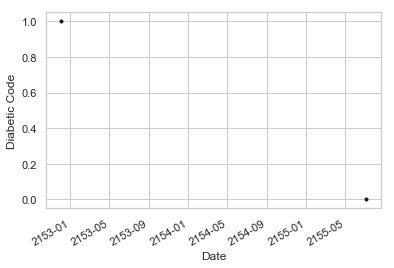

     hadm_id diabeties code  SUBJECT_ID                time
2372  170669           True       14313 2139-12-05 20:49:00
2373  195912           True       14313 2141-02-04 16:42:00
2554  152033          False       14313 2141-03-16 16:21:00


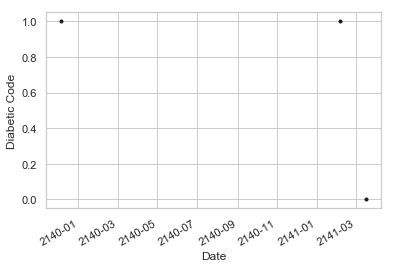

     hadm_id diabeties code  SUBJECT_ID                time
4923  116471          False       26601 2127-07-21 19:33:00
4924  125576           True       26601 2130-03-10 23:17:00
4925  155131           True       26601 2131-12-23 18:31:00


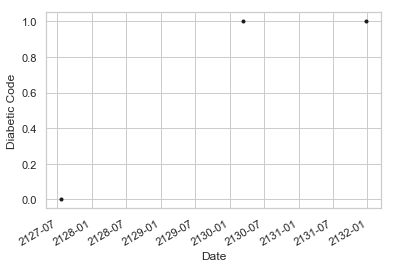

     hadm_id diabeties code  SUBJECT_ID                time
1791  121091          False       12267 2143-01-06 13:00:00
1792  125898           True       12267 2145-04-10 01:18:00


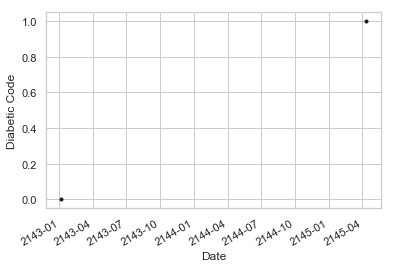

     hadm_id diabeties code  SUBJECT_ID                time
1439  108580          False       10220 2118-05-20 07:11:00
1440  123351           True       10220 2120-01-11 16:02:00
1441  157873          False       10220 2120-02-12 22:32:00


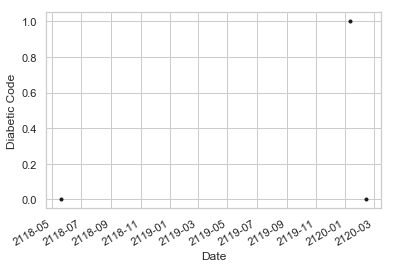

     hadm_id diabeties code  SUBJECT_ID                time
4731  192499          False       26603 2107-02-28 19:41:00
4926  127274           True       26603 2111-06-26 15:20:00


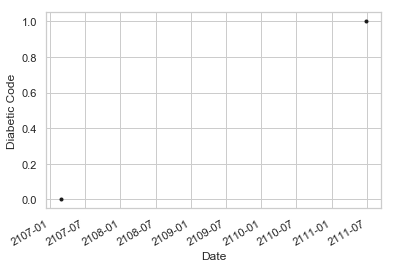

     hadm_id diabeties code  SUBJECT_ID                time
5743  133436           True       32743 2198-09-05 08:00:00
5741  129308           True       32743 2198-10-04 02:39:00
5744  189512           True       32743 2198-10-16 19:51:00
5742  130977          False       32743 2200-02-27 14:59:00
5740  113825           True       32743 2200-03-22 10:43:00


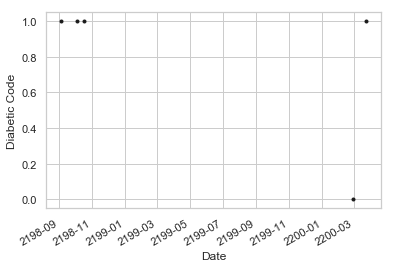

     hadm_id diabeties code  SUBJECT_ID                time
6957  197624           True       79851 2102-11-20 13:37:00
6956  171573           True       79851 2103-01-16 22:05:00
7076  116489          False       79851 2103-04-11 13:32:00


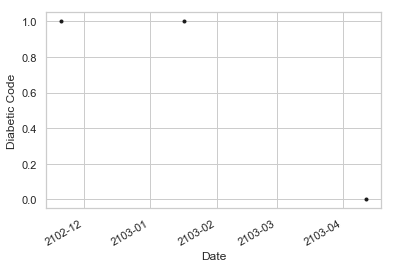

     hadm_id diabeties code  SUBJECT_ID                time
1794  150046           True       12272 2161-09-22 16:46:00
1793  132957          False       12272 2161-11-21 13:19:00


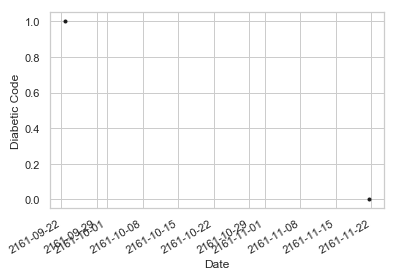

     hadm_id diabeties code  SUBJECT_ID                time
6963  145729           True       81904 2140-10-05 15:02:00
6964  173746          False       81904 2140-11-27 14:44:00


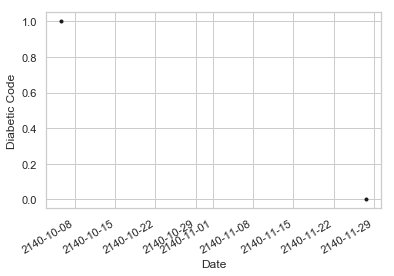

     hadm_id diabeties code  SUBJECT_ID                time
5320  146776           True       30707 2149-06-25 16:06:00
5298  142132          False       30707 2149-09-20 17:10:00
5321  161993           True       30707 2150-08-04 14:37:00
5331  172274          False       30707 2150-10-12 14:11:00
5332  193605           True       30707 2154-04-23 12:09:00


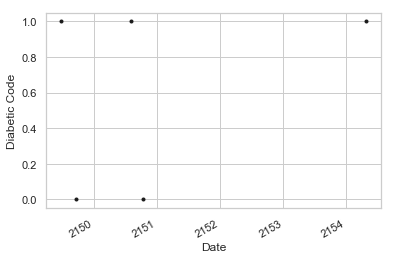

     hadm_id diabeties code  SUBJECT_ID                time
4949  185655          False       28660 2188-12-13 02:51:00
4948  128487           True       28660 2189-01-30 15:20:00


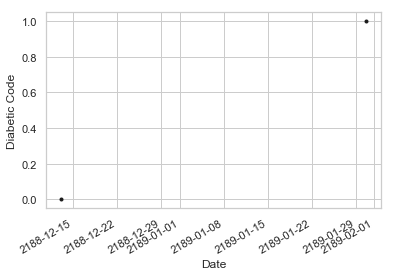

     hadm_id diabeties code  SUBJECT_ID                time
2778  172021           True       16375 2148-01-28 08:21:00
2756  108385          False       16375 2148-05-01 01:50:00


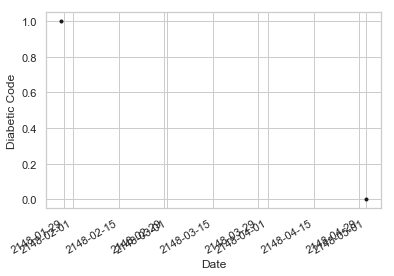

    hadm_id diabeties code  SUBJECT_ID                time
331  115117           True        2040 2145-10-27 23:00:00
332  124831           True        2040 2145-11-22 21:32:00
333  125913          False        2040 2146-07-10 20:58:00


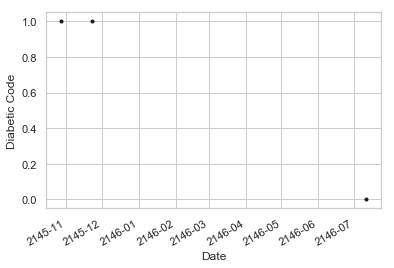

     hadm_id diabeties code  SUBJECT_ID                time
4104  156589           True       24569 2112-07-27 11:32:00
4103  130278           True       24569 2112-12-06 16:21:00
4102  104893          False       24569 2113-09-25 00:07:00


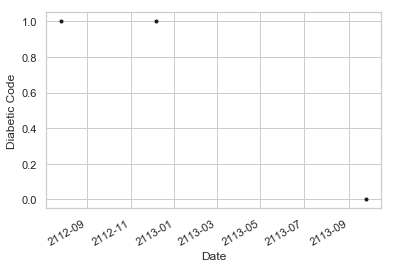

     hadm_id diabeties code  SUBJECT_ID                time
4750  177154          False       26618 2180-07-04 07:15:00
4749  115701           True       26618 2180-08-02 04:53:00


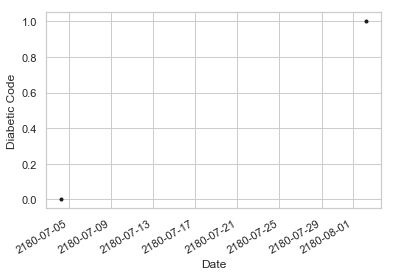

     hadm_id diabeties code  SUBJECT_ID                time
4146  176896          False       24571 2129-07-03 13:06:00
4145  175569           True       24571 2131-09-09 05:19:00
4147  193400           True       24571 2132-03-08 06:00:00
4106  112621           True       24571 2132-03-25 16:48:00
4105  108110           True       24571 2132-04-08 13:49:00
4144  147475           True       24571 2132-06-10 02:16:00
4107  137086           True       24571 2133-09-25 05:22:00


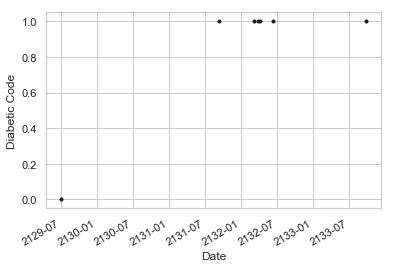

     hadm_id diabeties code  SUBJECT_ID                time
1323  130277           True        8188 2161-09-09 16:21:00
1324  162549          False        8188 2161-10-12 14:54:00


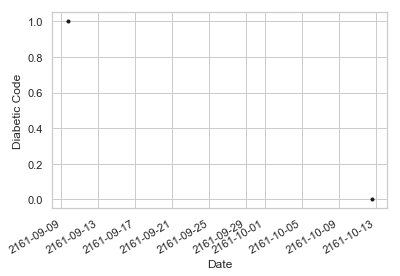

    hadm_id diabeties code  SUBJECT_ID                time
358  162865          False        2045 2145-10-27 22:51:00
359  174095          False        2045 2150-04-03 02:20:00
360  195707           True        2045 2150-08-03 16:34:00


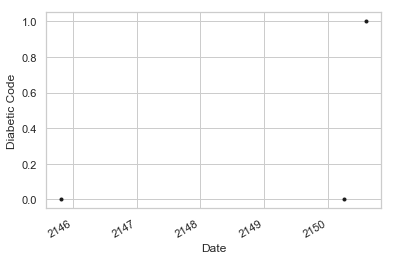

     hadm_id diabeties code  SUBJECT_ID                time
2551  173033           True       14334 2112-08-01 19:15:00
2550  168784          False       14334 2115-05-15 22:06:00


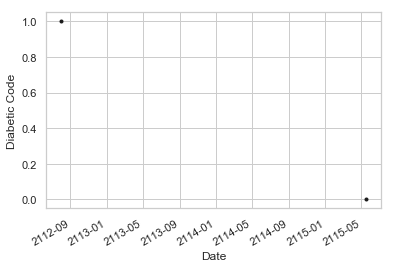

     hadm_id diabeties code  SUBJECT_ID                time
6152  149738           True       53247 2163-08-06 12:07:00
6151  126633          False       53247 2164-04-10 17:47:00


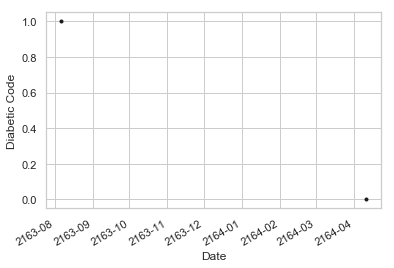

In [132]:
x=0
for patient in POI:
    if(x>100):
        df = masterDF.loc[masterDF['SUBJECT_ID'] == patient]
        print(df)
        fig, ax = plt.subplots()
        ax.plot_date(df['time'], df['diabeties code'], fmt='.', color='k')
        fig.autofmt_xdate()
        plt.xlabel('Date')
        plt.ylabel('Diabetic Code')
        plt.show()
    x = x+1


In [131]:
print(len(POI))

1077
